In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [5]:
import time

In [6]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

In [7]:
clf.C = 1

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

2.635955810546875 [ms]


0.96491228070175439

In [8]:
clf.C = 1e20

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

189.20016288757324 [ms]


0.95614035087719296

In [9]:
from sklearn.model_selection import GridSearchCV

param = {'C': 10**np.arange(-15.0,21.0)}

gs = GridSearchCV(clf, param, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    1.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1e+20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.0000...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

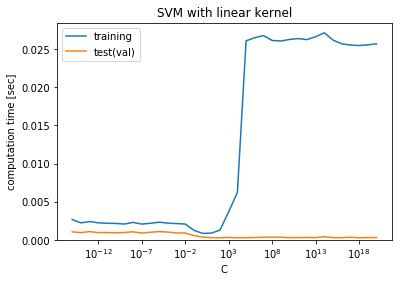

In [10]:
plt.plot(gs.cv_results_['param_C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_C'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best");
plt.title("SVM with linear kernel");

In [11]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

In [12]:
clf.C = 1

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

3.0050277709960938 [ms]


0.96491228070175439

In [13]:
clf.C = 1e20

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

6.763935089111328 [ms]


0.94736842105263153

In [14]:
from sklearn.model_selection import GridSearchCV

param = {'C': 10**np.arange(-15.0,21.0)}

gs2 = GridSearchCV(clf, param, verbose=1)
gs2.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1e+20, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.0000...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

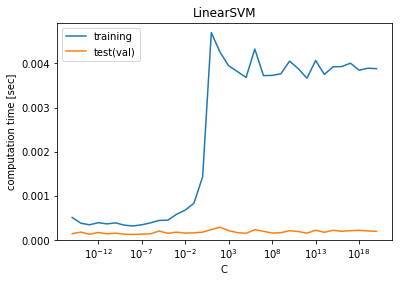

In [15]:
plt.plot(gs2.cv_results_['param_C'].data, 
         gs2.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs2.cv_results_['param_C'].data,
         gs2.cv_results_['mean_score_time'], 
         label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best")
plt.title("LinearSVM");

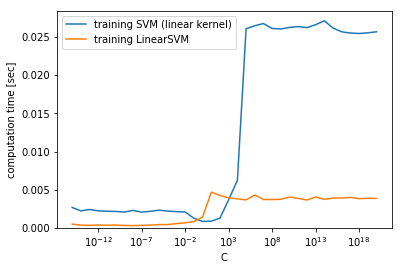

In [16]:
plt.plot(gs.cv_results_['param_C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training SVM (linear kernel)")

plt.plot(gs2.cv_results_['param_C'].data, 
         gs2.cv_results_['mean_fit_time'], 
         label="training LinearSVM")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best");

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

estimators = [('scaler', MinMaxScaler()), 
              ('clf', LinearSVC())]

pipe = Pipeline(estimators)

In [18]:
from sklearn.model_selection import GridSearchCV

param = {'clf__C': 10**np.arange(-15.0,21.0)}

gs = GridSearchCV(pipe, param, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

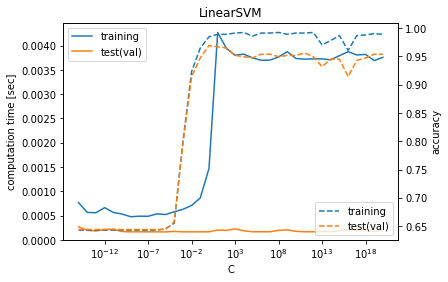

In [19]:
plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")
plt.ylabel("computation time [sec]")
plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.legend(loc="upper left");

plt.twinx()

plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_train_score'], 
         linestyle="--",
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_test_score'], 
         linestyle="--",
         label="test(val)")
plt.ylabel("accuracy")
plt.legend(loc="lower right");

plt.title("LinearSVM")

In [20]:
from sklearn.preprocessing import MaxAbsScaler

estimators = [('scaler', MinMaxScaler()), 
              ('clf', SVC(kernel='linear'))]

pipe = Pipeline(estimators)

In [21]:
from sklearn.model_selection import GridSearchCV

param = {'clf__C': 10**np.arange(-15.0,21.0)}

gs = GridSearchCV(pipe, param, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    1.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

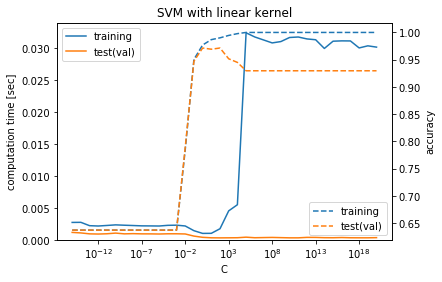

In [22]:
plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")
plt.ylabel("computation time [sec]")
plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.legend(loc="upper left");

plt.twinx()

plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_train_score'], 
         linestyle="--",
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_test_score'], 
         linestyle="--",
         label="test(val)")
plt.ylabel("accuracy")
plt.legend(loc="lower right");

plt.title("SVM with linear kernel");

In [23]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# MNISTの場合，60000が学習，10000がテスト，と決まっている
# http://yann.lecun.com/exdb/mnist/

X_train, X_test = mnist.data[:60000]/255., mnist.data[60000:]/255.
y_train, y_test = mnist.target[:60000], mnist.target[60000:]


In [24]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [25]:
clf = SVC(kernel='linear')

In [26]:
st = time.time()
clf.fit(X_train[::100], y_train[::100])
print(1000 * (time.time() - st), "[ms]")

175.8120059967041 [ms]


In [27]:
for thin in [100, 50, 10, 5, 4]: # > 1 min...
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.17 sec, size 600, accuracy 0.89
0.48 sec, size 1200, accuracy 0.9
5.46 sec, size 6000, accuracy 0.905
17.54 sec, size 12000, accuracy 0.917
25.21 sec, size 15000, accuracy 0.9164


In [28]:
clf = LinearSVC() # dual

In [29]:
for thin in [100, 50, 10, 5, 4]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.11 sec, size 600, accuracy 0.91
0.39 sec, size 1200, accuracy 0.865
2.44 sec, size 6000, accuracy 0.865
7.78 sec, size 12000, accuracy 0.894
12.34 sec, size 15000, accuracy 0.8952


In [30]:
clf = LinearSVC(dual=False) # primal

In [31]:
for thin in [100, 50, 10, 5, 4]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.16 sec, size 600, accuracy 0.91
0.22 sec, size 1200, accuracy 0.87
1.15 sec, size 6000, accuracy 0.865
3.45 sec, size 12000, accuracy 0.894
5.10 sec, size 15000, accuracy 0.8956


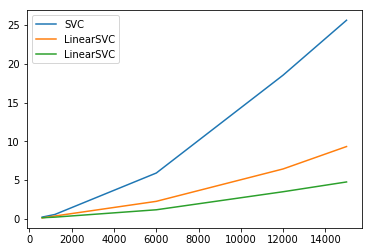

In [32]:
for clf in [SVC(kernel='linear'), 
            LinearSVC(), 
            LinearSVC(dual=False)]:
    times = []
    sizes = []
    for thin in [100, 50, 10, 5, 4]:
        st = time.time()
        clf.fit(X_train[::thin], y_train[::thin])
        times.append(time.time() - st)
        sizes.append(y_train[::thin].size)
    plt.plot(sizes, times, label=clf.__class__.__name__)

plt.legend(loc="best")
plt.show()

In [33]:
estimators = [('scaler', MinMaxScaler()), 
              ('clf', LinearSVC(dual=False))]

pipe = Pipeline(estimators)

param = {'clf__C': 10**np.arange(-5.0,10.0)}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train) # about 30min...

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=0.0001 ...................................................
[CV] clf__C=0.0001 ...................................................
[CV] clf__C=0.0001 ...................................................
[CV] clf__C=0.001 ....................................................
[CV] clf__C=0.001 ....................................................
[CV] ..................................... clf__C=1e-05, total=  16.8s
[CV] clf__C=0.001 ....................................................
[CV] ..................................... clf__C=1e-05, total=  18.1s
[CV] clf__C=0.01 .....................................................
[CV] ..................................... clf__C=1e-05, total=  18.9s
[CV] clf__C=0.01

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  9.5min


[CV] .................................... clf__C=1000.0, total= 9.8min
[CV] clf__C=1000000.0 ................................................
[CV] ................................... clf__C=10000.0, total= 8.0min
[CV] clf__C=1000000.0 ................................................
[CV] .................................... clf__C=1000.0, total= 8.8min
[CV] clf__C=1000000.0 ................................................
[CV] ................................... clf__C=10000.0, total= 9.1min
[CV] clf__C=10000000.0 ...............................................
[CV] ................................... clf__C=10000.0, total= 7.7min
[CV] clf__C=10000000.0 ...............................................
[CV] .................................. clf__C=100000.0, total= 6.4min
[CV] clf__C=10000000.0 ...............................................
[CV] .................................. clf__C=100000.0, total= 6.2min
[CV] clf__C=100000000.0 ..............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 22.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'clf__C': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05,   1.00000e+06,
         1.00000e+07,   1.00000e+08,   1.00000e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [ ]:
estimators = [('scaler', MinMaxScaler()), 
              ('clf', LinearSVC(dual=True))]

pipe = Pipeline(estimators)

param = {'clf__C': 10**np.arange(-5.0,10.0)}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train) # 1 hour ?

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=0.0001 ...................................................
[CV] clf__C=0.0001 ...................................................
[CV] clf__C=0.0001 ...................................................
[CV] clf__C=0.001 ....................................................
[CV] clf__C=0.001 ....................................................
[CV] ..................................... clf__C=1e-05, total=   6.5s
[CV] clf__C=0.001 ....................................................
[CV] ..................................... clf__C=1e-05, total=   7.3s
[CV] clf__C=0.01 .....................................................
[CV] .................................... clf__C=0.0001, total=   7.0s
[CV] clf__C=0.01

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.5min


[CV] .................................... clf__C=1000.0, total= 3.2min
[CV] clf__C=1000000.0 ................................................
[CV] ................................... clf__C=10000.0, total= 3.2min
[CV] .................................... clf__C=1000.0, total= 3.2min
[CV] clf__C=1000000.0 ................................................
[CV] clf__C=1000000.0 ................................................
[CV] ................................... clf__C=10000.0, total= 3.1min
[CV] clf__C=10000000.0 ...............................................
[CV] ................................... clf__C=10000.0, total= 3.2min
[CV] clf__C=10000000.0 ...............................................
[CV] .................................. clf__C=100000.0, total= 3.2min
[CV] clf__C=10000000.0 ...............................................
[CV] .................................. clf__C=100000.0, total= 3.1min
[CV] clf__C=100000000.0 ..............................................
[CV] .

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 12.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'clf__C': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05,   1.00000e+06,
         1.00000e+07,   1.00000e+08,   1.00000e+09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [ ]:
estimators = [('scaler', MinMaxScaler()), 
              ('clf', SVC(kernel='linear'))]

pipe = Pipeline(estimators)

param = {'clf__C': 10**np.arange(-5.0,10.0)}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train) # 2 hours ?

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=0.0001 ...................................................
[CV] clf__C=0.0001 ...................................................
[CV] clf__C=0.0001 ...................................................
[CV] clf__C=0.001 ....................................................
[CV] clf__C=0.001 ....................................................
[CV] ..................................... clf__C=0.001, total=27.8min
[CV] clf__C=0.001 ....................................................
[CV] ..................................... clf__C=0.001, total=28.0min
[CV] clf__C=0.01 .....................................................
[CV] ...................................... clf__C=0.01, total=14.6min
[CV] clf__C=0.01

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 234.0min


[CV] ................................... clf__C=1000.0, total=104.9min
[CV] clf__C=1000000.0 ................................................
[CV] ................................... clf__C=1000.0, total=104.1min
[CV] clf__C=1000000.0 ................................................
[CV] .................................. clf__C=10000.0, total=583.9min
[CV] clf__C=1000000.0 ................................................
[CV] ................................. clf__C=10000.0, total=1257.4min
[CV] clf__C=10000000.0 ...............................................
[CV] ................................. clf__C=10000.0, total=1411.0min
[CV] clf__C=10000000.0 ...............................................
[CV] ................................ clf__C=100000.0, total=5317.3min
[CV] clf__C=10000000.0 ...............................................
